In [1]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
X = boston.data
Y = boston.target
print(boston.DESCR)
# pd.DataFrame(X,columns=boston)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Steps:
- Load and Preprocess Data
- Create Model
- Add Layers
- Complile Model
- Train Model (via fit)
- Make Predictions
- Evaluate performance

### Load Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Load Dataset

In [3]:
from tensorflow.keras.datasets import boston_housing

(xtrain, ytrain), (xtest,ytest) = boston_housing.load_data()

In [4]:
xtrain.shape, xtest.shape

((404, 13), (102, 13))

In [5]:
xtrain.max()

711.0

### Data Preprocessing

In [6]:
from sklearn import preprocessing

In [7]:
minmax = preprocessing.MinMaxScaler()
x_train_new = minmax.fit_transform(xtrain)
x_test_new = minmax.transform(xtest)

In [8]:
x_train_new.max()

1.0000000000000002

### Custom r2 score metrics for keras backend

In [9]:
from tensorflow.keras import backend as K

def r2_keras(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred))
    SS_mean = K.sum(K.square(y_true-K.mean(y_true)))
    return (1- SS_res/SS_mean)

### Build Keras Model

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
model = Sequential()

### Add Layers

In [12]:
from tensorflow.keras.layers import Dense

Dense implements - activation(mx+c) 

In [13]:
model.add(Dense(32, input_dim=13, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Compile Model

In [14]:
model.compile(loss="mean_squared_error",optimizer="adam",metrics=[r2_keras])

<b>Dense</b> refers to a fully connected layer
<b>Sequential</b> add layer sequence by sequence

Dense Implements the operation: output = acivation(dot(input,kernel)+bias)
    

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


### Train Model (via fit)

In [16]:
history=model.fit(x_train_new,ytrain, batch_size=32,
                  epochs=100, validation_data=(x_test_new, ytest))

Train on 404 samples, validate on 102 samples
Epoch 1/100
404/404 [==============================] - 0s 598us/sample - loss: 578.7458 - r2_keras: -6.7651 - val_loss: 601.3896 - val_r2_keras: -19.5783
Epoch 2/100
404/404 [==============================] - 0s 73us/sample - loss: 566.2698 - r2_keras: -6.7661 - val_loss: 585.8433 - val_r2_keras: -6.5360
Epoch 3/100
404/404 [==============================] - 0s 74us/sample - loss: 548.5106 - r2_keras: -5.8515 - val_loss: 563.3772 - val_r2_keras: -5.8983
Epoch 4/100
404/404 [==============================] - 0s 84us/sample - loss: 521.7643 - r2_keras: -6.0052 - val_loss: 529.8211 - val_r2_keras: -6.0299
Epoch 5/100
404/404 [==============================] - 0s 74us/sample - loss: 483.7242 - r2_keras: -5.9290 - val_loss: 481.7012 - val_r2_keras: -5.8388
Epoch 6/100
404/404 [==============================] - 0s 72us/sample - loss: 430.7991 - r2_keras: -4.5532 - val_loss: 418.8836 - val_r2_keras: -4.3277
Epoch 7/100
404/404 [===================

404/404 [==============================] - 0s 74us/sample - loss: 24.4358 - r2_keras: 0.7054 - val_loss: 25.3273 - val_r2_keras: 0.7314
Epoch 56/100
404/404 [==============================] - 0s 74us/sample - loss: 24.0588 - r2_keras: 0.6944 - val_loss: 24.8859 - val_r2_keras: 0.7361
Epoch 57/100
404/404 [==============================] - 0s 79us/sample - loss: 23.7318 - r2_keras: 0.7289 - val_loss: 24.6660 - val_r2_keras: 0.7295
Epoch 58/100
404/404 [==============================] - 0s 57us/sample - loss: 23.6613 - r2_keras: 0.6768 - val_loss: 24.4413 - val_r2_keras: 0.6573
Epoch 59/100
404/404 [==============================] - 0s 57us/sample - loss: 23.1637 - r2_keras: 0.7253 - val_loss: 24.3011 - val_r2_keras: 0.7085
Epoch 60/100
404/404 [==============================] - 0s 57us/sample - loss: 22.9068 - r2_keras: 0.6964 - val_loss: 24.0066 - val_r2_keras: 0.6748
Epoch 61/100
404/404 [==============================] - 0s 67us/sample - loss: 22.6809 - r2_keras: 0.7340 - val_loss: 2

### Prediction

In [21]:
prediction = model.predict(x_test_new)

###  Evaluate Performance

In [27]:
df = pd.DataFrame({"Actual":ytest, "Prediction":prediction.flatten()})
df.head()

Actual  Prediction
0     7.2   10.939822
1    18.8   18.709230
2    19.0   20.463028
3    27.0   33.941410
4    22.2   24.284124

In [17]:
model.evaluate(x_test_new, ytest)

102/102 [==============================] - 0s 54us/sample - loss: 22.7999 - r2_keras: 0.5451


[22.799869761747473, 0.54512167]

### Visualize results

In [18]:
history.history.keys()

dict_keys(['loss', 'r2_keras', 'val_loss', 'val_r2_keras'])

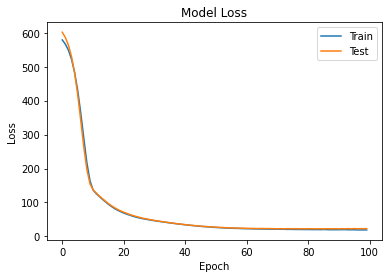

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Test'])
plt.show()

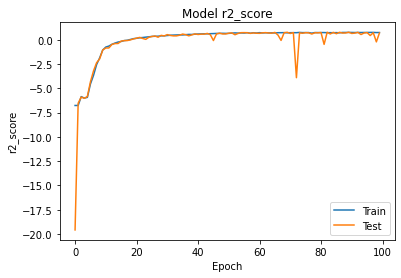

In [28]:
plt.plot(history.history['r2_keras'])
plt.plot(history.history['val_r2_keras'])
plt.title("Model r2_score")
plt.xlabel("Epoch")
plt.ylabel("r2_score")
plt.legend(['Train','Test'])
plt.show()

### Kernal Initializer (weight Initializer) in Keras

https://keras.io/api/layers/initializers/

In [30]:
from tensorflow.keras import optimizers
from tensorflow.keras import initializers

In [31]:
model1 = Sequential()
model1.add(Dense(50, input_dim=13, activation='relu', 
                kernel_initializer='random_uniform'))

model1.add(Dense(100,activation='relu'))
model1.add(Dense(1))

sgd = optimizers.SGD(lr=.01, momentum=0.9)
model1.compile(loss='mean_squared_error',optimizer=sgd, metrics=[r2_keras])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [32]:
history=model1.fit(x_train_new,ytrain, batch_size=32, 
                   epochs=100, validation_data=(x_test_new, ytest))

Train on 404 samples, validate on 102 samples
Epoch 1/100
404/404 [==============================] - 0s 311us/sample - loss: 405.1099 - r2_keras: -5.0373 - val_loss: 95.1521 - val_r2_keras: -0.7282
Epoch 2/100
404/404 [==============================] - 0s 66us/sample - loss: 95.1561 - r2_keras: -0.1365 - val_loss: 83.2682 - val_r2_keras: -0.2398
Epoch 3/100
404/404 [==============================] - 0s 67us/sample - loss: 88.1920 - r2_keras: -0.1041 - val_loss: 84.1375 - val_r2_keras: -0.3297
Epoch 4/100
404/404 [==============================] - 0s 72us/sample - loss: 85.9112 - r2_keras: -0.0648 - val_loss: 84.4025 - val_r2_keras: -0.0566
Epoch 5/100
404/404 [==============================] - 0s 143us/sample - loss: 84.8932 - r2_keras: -0.0181 - val_loss: 84.0875 - val_r2_keras: -0.0398
Epoch 6/100
404/404 [==============================] - 0s 114us/sample - loss: 85.0133 - r2_keras: -0.0321 - val_loss: 83.3826 - val_r2_keras: -0.3108
Epoch 7/100
404/404 [=============================

Epoch 55/100
404/404 [==============================] - 0s 81us/sample - loss: 84.7407 - r2_keras: -0.0312 - val_loss: 83.9373 - val_r2_keras: -0.0087
Epoch 56/100
404/404 [==============================] - 0s 72us/sample - loss: 84.8395 - r2_keras: -0.0202 - val_loss: 83.6740 - val_r2_keras: -0.0366
Epoch 57/100
404/404 [==============================] - 0s 69us/sample - loss: 84.8215 - r2_keras: -0.0426 - val_loss: 83.6769 - val_r2_keras: -0.0758
Epoch 58/100
404/404 [==============================] - 0s 54us/sample - loss: 84.7261 - r2_keras: -0.0295 - val_loss: 83.9539 - val_r2_keras: -0.4158
Epoch 59/100
404/404 [==============================] - 0s 74us/sample - loss: 84.7372 - r2_keras: -0.0294 - val_loss: 83.5901 - val_r2_keras: -0.0101
Epoch 60/100
404/404 [==============================] - ETA: 0s - loss: 81.7223 - r2_keras: -0.02 - 0s 62us/sample - loss: 84.8606 - r2_keras: -0.0413 - val_loss: 83.6175 - val_r2_keras: -0.0138
Epoch 61/100
404/404 [============================

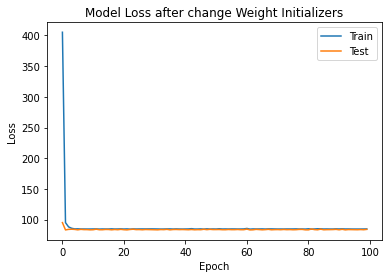

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss after change Weight Initializers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Test'])
plt.show()

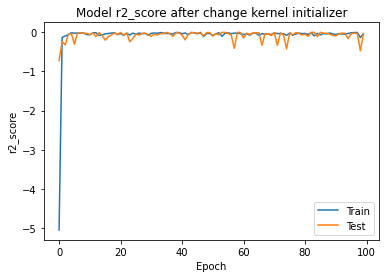

In [34]:
plt.plot(history.history['r2_keras'])
plt.plot(history.history['val_r2_keras'])
plt.title("Model r2_score after change kernel initializer")
plt.xlabel("Epoch")
plt.ylabel("r2_score")
plt.legend(['Train','Test'])
plt.show()

### Adding Regularization to our Neural Network 

Regularizers allow to apply penalities on layer parameters or layer activity during optimization. These penalities incorporated in the loss function that the network optimizes

In [35]:
from tensorflow.keras import regularizers

In [36]:
model2 = Sequential()
model2.add(Dense(100, input_dim=13, activation='relu', 
                kernel_initializer='random_uniform',bias_initializer='zeros',
                 kernel_regularizer=regularizers.l2(0.01)))

model2.add(Dense(100,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dense(1))

sgd = optimizers.SGD(lr=.01, momentum=0.9)
model2.compile(loss='mean_squared_error',optimizer=sgd, metrics=[r2_keras])


In [37]:
history=model2.fit(x_train_new,ytrain, batch_size=32, 
                   epochs=100, validation_data=(x_test_new, ytest))

Train on 404 samples, validate on 102 samples
Epoch 1/100
404/404 [==============================] - 0s 465us/sample - loss: 314.6245 - r2_keras: -3.2661 - val_loss: 80.3937 - val_r2_keras: 0.0098
Epoch 2/100
404/404 [==============================] - 0s 74us/sample - loss: 92.4517 - r2_keras: -0.0357 - val_loss: 96.3072 - val_r2_keras: -0.0805
Epoch 3/100
404/404 [==============================] - 0s 82us/sample - loss: 76.9261 - r2_keras: 0.1999 - val_loss: 62.1353 - val_r2_keras: 0.2783
Epoch 4/100
404/404 [==============================] - 0s 67us/sample - loss: 62.3995 - r2_keras: 0.3992 - val_loss: 75.5513 - val_r2_keras: 0.0568
Epoch 5/100
404/404 [==============================] - 0s 79us/sample - loss: 73.0152 - r2_keras: 0.2869 - val_loss: 73.5978 - val_r2_keras: 0.2729
Epoch 6/100
404/404 [==============================] - 0s 91us/sample - loss: 60.2506 - r2_keras: 0.4456 - val_loss: 43.2015 - val_r2_keras: 0.6082
Epoch 7/100
404/404 [==============================] - 0s 84u

Epoch 55/100
404/404 [==============================] - 0s 77us/sample - loss: 86.1029 - r2_keras: -0.0364 - val_loss: 85.1954 - val_r2_keras: -0.1435
Epoch 56/100
404/404 [==============================] - 0s 111us/sample - loss: 86.0531 - r2_keras: -0.0158 - val_loss: 84.9023 - val_r2_keras: -0.0946
Epoch 57/100
404/404 [==============================] - 0s 77us/sample - loss: 86.0549 - r2_keras: -0.0201 - val_loss: 85.2408 - val_r2_keras: -0.0972
Epoch 58/100
404/404 [==============================] - 0s 74us/sample - loss: 85.8597 - r2_keras: -0.0237 - val_loss: 84.7070 - val_r2_keras: -0.0230
Epoch 59/100
404/404 [==============================] - 0s 77us/sample - loss: 86.1287 - r2_keras: -0.0558 - val_loss: 84.6995 - val_r2_keras: -0.0759
Epoch 60/100
404/404 [==============================] - 0s 91us/sample - loss: 86.5584 - r2_keras: -0.0563 - val_loss: 85.1246 - val_r2_keras: -0.0414
Epoch 61/100
404/404 [==============================] - 0s 72us/sample - loss: 85.6292 - r2_k

In [38]:
model2.evaluate(x_test_new,ytest)

102/102 [==============================] - 0s 78us/sample - loss: 83.9051 - r2_keras: -0.2007


[83.90508913526348, -0.20073438]

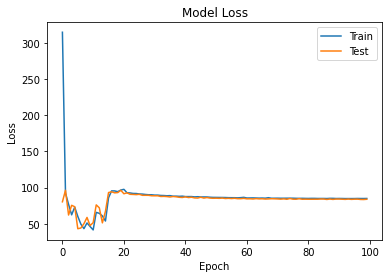

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Test'])
plt.show()

### A simple  and powerful regularization technique for neural networks and deep learning models in dropout

In [40]:
from tensorflow.keras.layers import Dropout

In [42]:
model3 = Sequential()

model3.add(Dense(500,input_dim=13, activation='relu', 
                kernel_regularizer = regularizers.l2(0.01)))
model3.add(Dropout(0.2))
           
model3.add(Dense(500, activation='relu',kernel_regularizer = regularizers.l2(0.01)))
model3.add(Dropout(0.2))
           
model3.add(Dense(1))
model3.compile(loss='mean_squared_error',optimizer='adam', metrics=[r2_keras])

In [43]:
history=model3.fit(x_train_new,ytrain, batch_size=32, 
                   epochs=100, validation_data=(x_test_new, ytest))

Train on 404 samples, validate on 102 samples
Epoch 1/100
404/404 [==============================] - 0s 988us/sample - loss: 478.4477 - r2_keras: -5.1455 - val_loss: 316.2651 - val_r2_keras: -3.2138
Epoch 2/100
404/404 [==============================] - 0s 240us/sample - loss: 174.3037 - r2_keras: -1.2925 - val_loss: 160.8906 - val_r2_keras: -1.2728
Epoch 3/100
404/404 [==============================] - 0s 237us/sample - loss: 114.8350 - r2_keras: -0.4839 - val_loss: 92.6557 - val_r2_keras: -0.0445
Epoch 4/100
404/404 [==============================] - 0s 222us/sample - loss: 77.1311 - r2_keras: 0.1301 - val_loss: 68.2496 - val_r2_keras: 0.2808
Epoch 5/100
404/404 [==============================] - 0s 249us/sample - loss: 61.7648 - r2_keras: 0.2829 - val_loss: 59.6439 - val_r2_keras: -0.3677
Epoch 6/100
404/404 [==============================] - 0s 212us/sample - loss: 55.7728 - r2_keras: 0.3614 - val_loss: 53.4094 - val_r2_keras: 0.3726
Epoch 7/100
404/404 [===========================

404/404 [==============================] - 0s 210us/sample - loss: 14.6358 - r2_keras: 0.8607 - val_loss: 32.3992 - val_r2_keras: 0.6345
Epoch 56/100
404/404 [==============================] - 0s 214us/sample - loss: 15.3866 - r2_keras: 0.8328 - val_loss: 27.5987 - val_r2_keras: 0.5519
Epoch 57/100
404/404 [==============================] - 0s 230us/sample - loss: 13.4722 - r2_keras: 0.8555 - val_loss: 28.0106 - val_r2_keras: 0.5694
Epoch 58/100
404/404 [==============================] - 0s 217us/sample - loss: 14.4261 - r2_keras: 0.8555 - val_loss: 27.9956 - val_r2_keras: 0.3983
Epoch 59/100
404/404 [==============================] - 0s 201us/sample - loss: 14.8858 - r2_keras: 0.8364 - val_loss: 27.4846 - val_r2_keras: 0.6612
Epoch 60/100
404/404 [==============================] - 0s 221us/sample - loss: 14.4089 - r2_keras: 0.8541 - val_loss: 29.0107 - val_r2_keras: 0.6625
Epoch 61/100
404/404 [==============================] - 0s 220us/sample - loss: 14.7430 - r2_keras: 0.8506 - val_

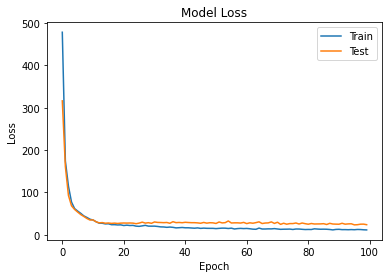

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Test'])
plt.show()

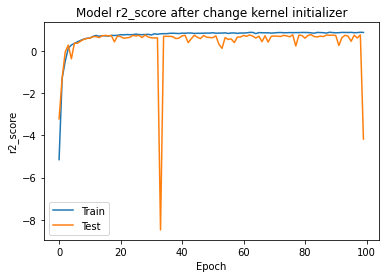

In [45]:
plt.plot(history.history['r2_keras'])
plt.plot(history.history['val_r2_keras'])
plt.title("Model r2_score after change kernel initializer")
plt.xlabel("Epoch")
plt.ylabel("r2_score")
plt.legend(['Train','Test'])
plt.show()